In [ ]:
!pip install streamlit
import streamlit as st

In [ ]:
st.title('My Final Project!')

2024-12-15 20:14:26.360 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-15 20:14:26.761 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-15 20:14:26.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

# **Introduction:**

Working on this project blasting Lady Gaga, I reflect on the thousands of songs I've listened to over the course of my life. The music industry has always fascinated me, especially the seemingly random process through which certain songs achieve massive popularity while others, seemingly just as deserving, fade into obscurity. I have a strong upbringing in classical music, listening to Beethoven, Mozart, and the likes. From that it's fairly intuitive to me why certain songs resonate through the ages: they sound good. However, in today's modern world I'm not so certain what affects popularity.

I wanted to explore one question: Is a song's popularity primarily determined by its intrinsic musical qualities, or is it largely a matter of luck, timing, artist brand or other external factors? By delving into the raw data of music looking at factors such as the genre, the "lyricism", tempo and many many other classifications under the song, I hope to be able to find an existence of a trend. I deliberately chose to exclude artist-related variables such as the fame or reputation of the performer. While these are undeniably significant factors in a song's success, I wanted to focus on the musical essence itself: the raw features and stylistic elements that characterize a track. This decision allowed me to investigate whether, at the end of the day, popularity can be linked to the musicality of a song rather than external factors such as promotional efforts or the artist’s star power. Understanding this trend would be deeply interesting for me.

The success of this project would imply an "ideal" song or a genre of work that would be most likely to succeed. The failure would show that the external factors, were indeed the most important.

# **Data Description:**

The data I have chosen to use for this project is sourced from the TidyTuesday Spotify dataset, available in CSV format. The dataset provides detailed information about various songs on Spotify, including their musical attributes, popularity scores, and genre classifications. This includes filtering out low-popularity songs and narrowing the analysis to more specific genres such as pop and rap, which dominate mainstream attention. The rationale for filtering out low-popularity songs is actually very important as there are thousands of songs that are not actually songs including joke submissions, start-up artists are misnomers which will negatively skew the data.

This dataset contains a deeply comprehensive 32,833 rows of songs and over 20 columns detailing their musical attributes and metadata. Key features include numerical values such as danceability, energy, and loudness, as well as categorical features like genre. By leveraging these attributes, this project seeks to uncover the extent to which a song's intrinsic musical characteristics influence its popularity

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.inspection import permutation_importance

df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
#max popularity song
df[df['track_popularity'] == 100]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
1551,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,pop,...,6,-6.4,0,0.0924,0.692,0.000104,0.149,0.513,98.027,209438
20091,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,Tones and I,100,0UywfDKYlyiu1b38DRrzYD,Dance Monkey (Stripped Back) / Dance Monkey,2019-10-17,Global Top 50 | 2020 Hits,1KNl4AYfgZtOVm9KHkhPTF,latin,...,6,-6.4,0,0.0924,0.692,0.000104,0.149,0.513,98.027,209438


In [ ]:
# Least popular song example
df[df['track_popularity'] == 0].head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
476,1gsb4CFzUMERAkfzAKwrZu,Siren,SUNMI,0,75eIP5pPvtQCB0bAz2TEsU,WARNING,2018-09-26,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,pop,...,9,-3.885,0,0.0385,0.011900,0.000000,0.0887,0.545,122.051,197252
772,4yEXem27DzCg8xytvvO3E9,Lollipop (Candyman),Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,0,-3.612,0,0.0310,0.031700,0.007400,0.1710,0.861,139.047,215053
801,7vHkU1H73z5NVbGTIyI1DG,Around The World,Aqua,0,2vb252Haz9iX4iOd7vP8kX,Greatest Hits,2009-01-01,90s Dance Hits,50cXvxgMGrvoUeLhkzCyIO,pop,...,6,-3.847,1,0.0312,0.003320,0.000182,0.5370,0.969,129.934,209120
883,3decfgk2pFkvCzYUFj6ssf,I'm Yours,Influencers Worship,0,2FQCn5R6hSDeGYgUCW5kN9,I'm Yours,2018-07-06,Christian Dance Party,37i9dQZF1DWUUPO0Sbx2CM,pop,...,11,-6.397,0,0.0557,0.000186,0.000994,0.1690,0.357,127.995,205280
934,5KHbu2Go6NBryS0h0TpTNJ,Talk About It,Bancali,0,5aBI1WNIur9niQ5dM6xnVB,Talk About It,2018-01-17,Pop Dance Hits,7eERKCkgNKCCx5GYdeMIZf,pop,...,7,-6.740,0,0.2230,0.508000,0.000521,0.4190,0.318,110.024,248727


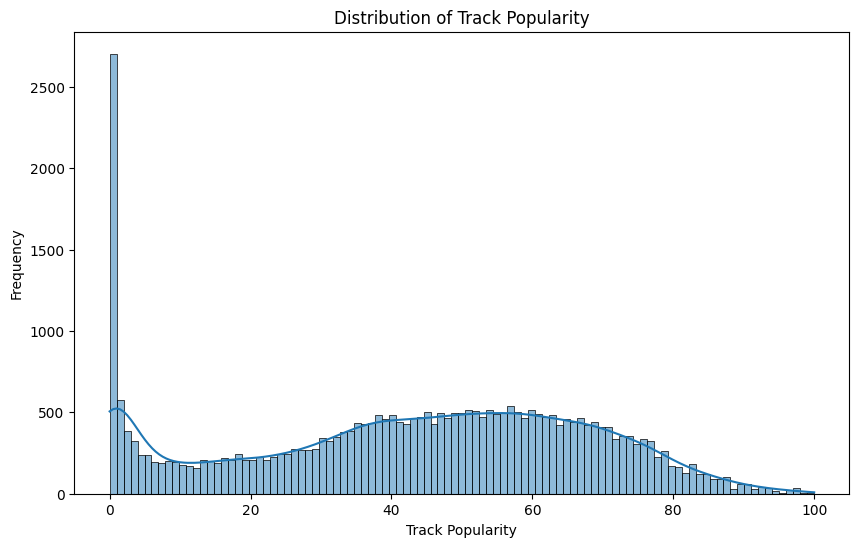

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=df['track_popularity'].nunique(), kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

We quickly see a major trend here: a vast majority of the data lies in the 0-5 popularity zone: likely due to joke songs, and noisy uploads into Spotify which don't necesarily have the best applicability in the scheme of the data. More importantly, we can see that outside of this huge tail, this is a fairly normally distributed data with a mean of approximately 50.

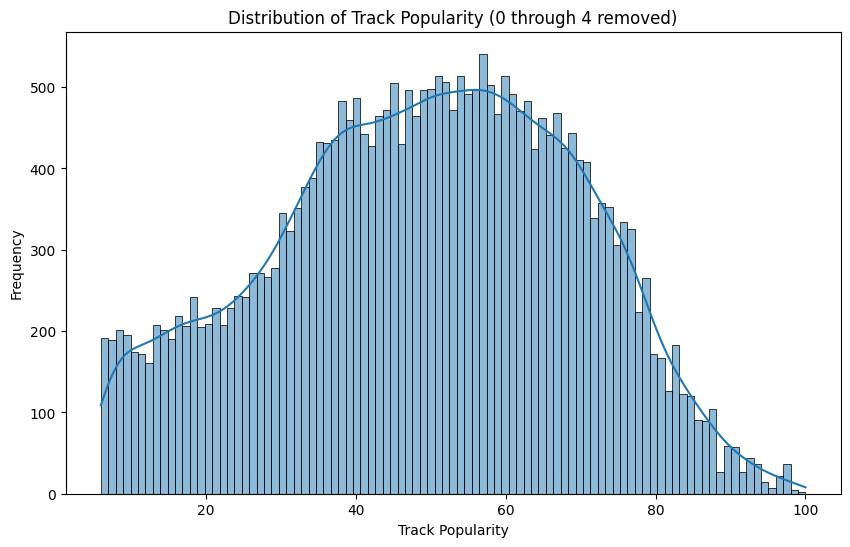

In [ ]:
# Cleaning noisy data
df_filtered = df[~df['track_popularity'].isin([0,1,2,3,4, 5])]

plt.figure(figsize=(10, 6))
sns.histplot(df_filtered['track_popularity'], bins=df_filtered['track_popularity'].nunique(), kde=True)
plt.title('Distribution of Track Popularity (0 through 4 removed)')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

Upon removing the first 5 data points which would most likely confound our data, it becomes much more normally distributed. However, it is important to note that having songs in the top 10 percentile is exceedingly rare and seems to be up to chance more than anything.

In [ ]:
# Filter out songs with low popularity scores
df['is_rap'] = (df['playlist_genre'] == 'rap').astype(int)
df['is_pop'] = (df['playlist_genre'] == 'pop').astype(int)
df['is_rock'] = (df['playlist_genre'] == 'rock').astype(int)

#Drop playlist column
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,is_rap,is_pop,is_rock
count,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000,28607.000000
mean,48.637676,0.657011,0.693081,5.352641,-6.724681,0.566889,0.106935,0.180577,0.079454,0.188036,0.510253,120.828016,222898.773272,0.176705,0.174852,0.148565
std,20.526082,0.144758,0.180681,3.613834,2.976626,0.495514,0.101087,0.222004,0.217948,0.151240,0.231846,27.033736,58154.040561,0.381426,0.379847,0.355665
min,5.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,31429.000000,0.000000,0.000000,0.000000
25%,34.000000,0.565000,0.575000,2.000000,-8.155000,0.000000,0.040900,0.016800,0.000000,0.092850,0.331000,99.945000,186120.000000,0.000000,0.000000,0.000000
50%,50.000000,0.674000,0.715000,6.000000,-6.173000,1.000000,0.062400,0.085600,0.000013,0.126000,0.511000,121.503000,213840.000000,0.000000,0.000000,0.000000
75%,64.000000,0.762000,0.834000,9.000000,-4.665000,1.000000,0.132000,0.264000,0.003640,0.244000,0.691000,134.033500,249960.000000,0.000000,0.000000,0.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.994000,0.996000,0.991000,239.440000,517810.000000,1.000000,1.000000,1.000000


In [ ]:
# Create my features variable
features = ['danceability', 'energy', 'speechiness', 'acousticness', 'valence']+['is_rap', 'is_pop', 'is_rock']

X = df[features]
y = df['track_popularity']

# Split the data into training and testing sets. I chose to sue the standard test sample of 20% and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data to ensure models like KNN have the best opportunity to succeed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

For my baseline model, I chose to use a mean effectively implying no correlation between the two. Further, I chose to use mean squared error or MSE as my benchmark of the "best" model.

In [ ]:
# Baseline Model
baseline_prediction = np.mean(df['track_popularity'])
baseline_mse = mean_squared_error(y_test, [baseline_prediction] * len(y_test))
baseline_r2 = r2_score(y_test, [baseline_prediction] * len(y_test))

print(f"Baseline Model - MSE: {baseline_mse}")

Baseline Model - MSE: 418.61881194285587


The implied MSE of 418 is quite high, but that's to be expected. Looking next at the linear regression, this is a very simple regression and unlikely to work. While it may not capture the full complexity of the data, it establishes a clear baseline for comparison against more advanced models.


In [ ]:
#Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model - MSE: {mse}")

# Feature Importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': abs(model.coef_)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

Linear Regression Model - MSE: 411.48055579319595


,Feature,Importance
6,is_pop,2.060823
1,energy,1.501455
0,danceability,1.197090
7,is_rock,1.042647
4,valence,0.973659
3,acousticness,0.660095
2,speechiness,0.401034
5,is_rap,0.245208


Unfortunately our MSE is not significantly improved, however, we do gain some interesting insights through the feature importance. The leading factor is not a necessarily an innate musical feature but rather whether or not if it is in the pop genre. Our decreased MSE is not to be unexpected, it's to be exected that many different factors affect the popularity of asong and to an extent, they also affect each other. For instance, being in the pop genre would imply a certain level of lyricism.

Next is the random forest model. I have the highest hope for this model given the seemingly non-linear relationship between the variables and the popularity variable. Random Forest effectively models complex, non-linear relationship so therefore, this shoudl yield a better result.

In [ ]:
# Random Forest Model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {rf_mse}")
# Feature Importance using coefficients
feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Random Forest):")
feature_importance_rf

Random Forest - MSE: 330.07439352752783

Feature Importance (Random Forest):


,Feature,Importance
3,acousticness,0.211610
2,speechiness,0.191938
4,valence,0.191847
1,energy,0.188073
0,danceability,0.181558
5,is_rap,0.012361
7,is_rock,0.011737
6,is_pop,0.010876


As we predicted, the MSE is *significantly* lower than any other model. The Random Forest model highlights that audio attributes, especially acousticness, speechiness, and valence, are the strongest predictors of track_popularity, contrary to every other model. Binary genre features contribute minimally, suggesting that song characteristics outweigh genre classification in determining popularity. This is particularly interesting given how different of a result it provdies compared to every single other model. Overall, this was the most successful model out of all and was most capable of predicting accurately.

In [ ]:
# Initialize and train a KNN regressor model
knn_model = KNeighborsRegressor(n_neighbors=50)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"KNN Mean Squared Error: {mse_knn}")

# Feature importance
perm = permutation_importance(knn_model, X_test, y_test, n_repeats=30, random_state=42)
pd.DataFrame({'Feature': X.columns, 'Importance': perm.importances_mean})

KNN Mean Squared Error: 409.77403900734004


,Feature,Importance
0,danceability,0.008441
1,energy,0.016648
2,speechiness,0.009520
3,acousticness,0.015845
4,valence,0.012607
5,is_rap,0.004645
6,is_pop,0.022269
7,is_rock,0.012128


The results for KNN were disappointing. KNN’s high MSE even compared to the baseline and regression, and low feature importance values indicate that it is not well-suited for this particular dataset and the many confounding variables that exist. The lack of localized patterns most likely hindered this model's performance. The struggle to generalize really hurt.

Decision Tree Mean Squared Error: 402.9988998045332


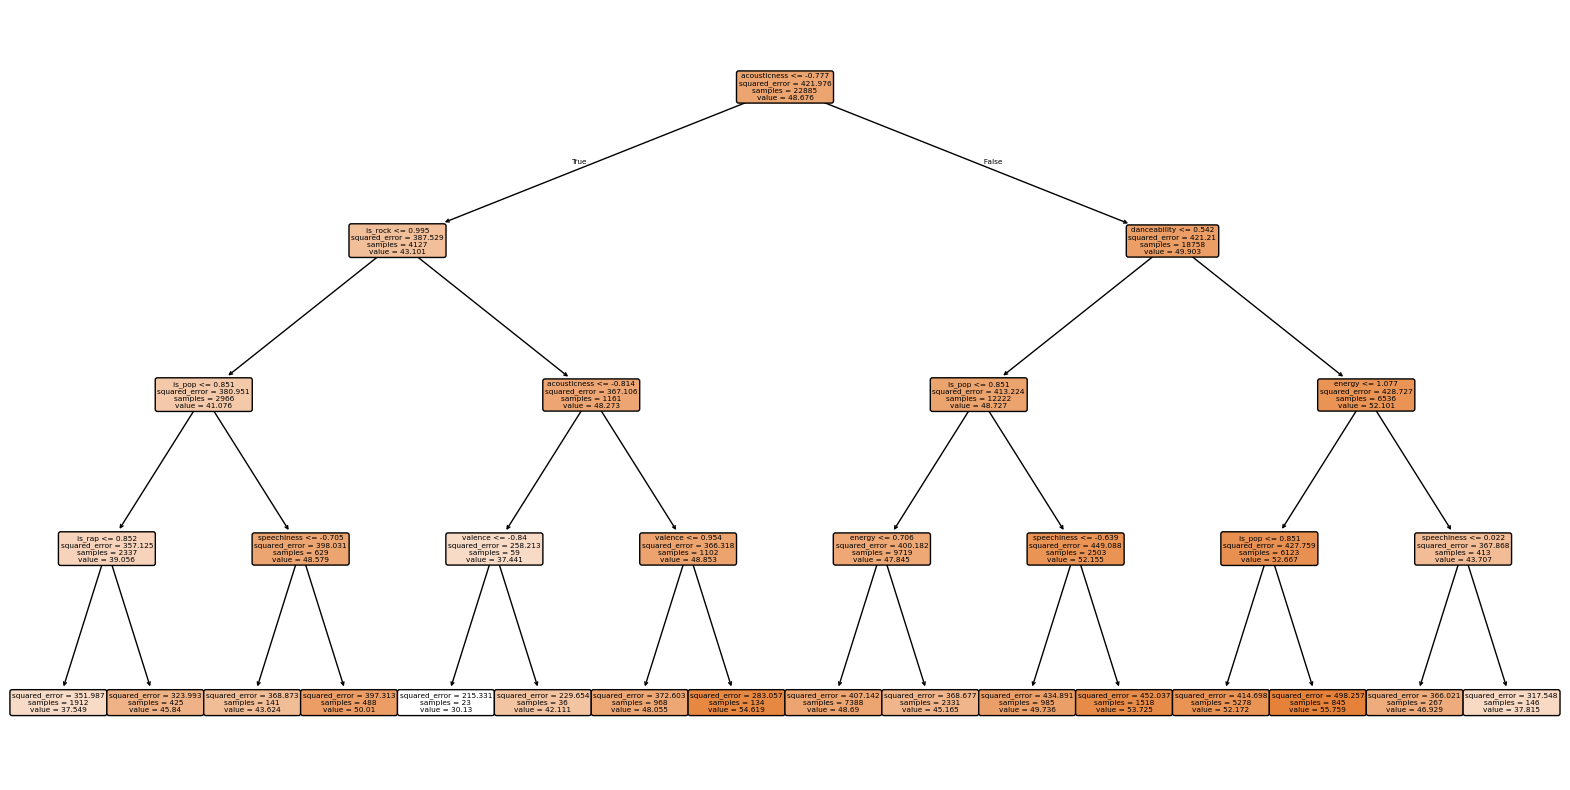


Feature Importance (Decision Tree):


,Feature,Importance
3,acousticness,0.361887
6,is_pop,0.201672
1,energy,0.117267
0,danceability,0.107063
7,is_rock,0.095477
5,is_rap,0.052805
2,speechiness,0.048175
4,valence,0.015655


In [ ]:
tree_model = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_tree)
print(f"Decision Tree Mean Squared Error: {mse_tree}")

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X.columns, rounded=True)
plt.show()

feature_importance_tree = pd.DataFrame({'Feature': X.columns, 'Importance': tree_model.feature_importances_})
feature_importance_tree = feature_importance_tree.sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Decision Tree):")
feature_importance_tree

The MSE for the decision tree was in the same ball park as the other models, outside of RFM.  One key issue is the reliance on a small number of dominant features, particularly acousticness and is_pop, while completely ignoring others like speechiness, valence, and is_rap. This overemphasis on a few features probably led to overfitting, where the model performed well on the training set but failed to generalize on the test set.

# **Conclusion:**
In this analysis, we explored various predictive models—including Linear Regression, Multiple Regression, Random Forest, K-Nearest Neighbors (KNN), and Decision Tree—to understand what factors might influence a song's popularity. While none of the models produced exceptionally low MSEs, this outcome aligns with the initial expectations of the project. Predicting song popularity is inherently complex, as external factors like marketing, cultural influence, and artist fame play a significant role—elements that cannot be captured purely through numerical and genre-based features. While the models themselves were not great at predicting the popularity of the songs, we were able to very rouhgly figure out what might aid.

However, a couple key factors did appear. **Acousticness and danceability** were particularly strong in relation to the other factors when conducitng feature importance, with stronger correlation with popularity, particularly in the Decision Tree and Random Forest models. Further, being a **pop song**, while weak as an absolute measure, stood out amongst all genres that were tested. This alings rather strongly with general sentiment on music today.

On a broader level, I learned the importance of balancing model complexity with interpretability. Random Forest consistently outperformed others, demonstrating the power of ensemble methods to capture non-linear relationships, while simpler models like Linear Regression established a baseline for comparison.

# **Next Steps:**
I've always enjoyed music for the actual intrinsic values, however, when looking at modern popular music obviously other factors must come into play. I hope to examine more external variables such as artist recognition, playlist placements, streaming counts, and release date trends in a future project. These would more likley be stronger predictive factors than the intrinsic factors we looked at today.

Further, I think looking on a time horizon such as analyzing how popularity changes over time by incorporating release year or weekly streaming trends could be really interesting, and seeing what sparks the interest in a song. A time-series analysis could capture evolving audience preferences and seasonal effects.

Lastly, I think I want to simplify this project: I had many, many variables throughout the whole project which really made modeling and predicting quite difficult. Down the road, maybe looking at one artist, or songs from one period and analyzing what qualities make them attractive would trul be able to provide strong predictive power.

# **Final Thoughts**
From a learning perspective, this was easily the most complex project I've had to do, combining everythign we've learned over the last year and trying to extrapolate that into this project. While my results unfortunately didn't create the idealized beautiful model that I hoped to have made, it did confirm my initial suspicions which is just as good of a result in my eyes and I deeply enjoyed the process of figuring out the answer to my hypothesis. Overall, I'm excited to acutally expand on this project over the winter and hopefully find some interesting results within the music space!